# `CNOT` stretching

This notebook illustrates how a `CNOT` gate can be stretched and check if the stretched gates are still accurate.

## Backend initialisation

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load IBMQ Account data
from qiskit import IBMQ
IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default') 
backend = provider.get_backend('ibmq_sydney')
properties = backend.properties()
configuration = backend.configuration()
defaults = backend.defaults()

## `CNOT` schedule

In [3]:
from qiskit import QuantumCircuit, schedule

circuit = QuantumCircuit(2)
circuit.cx(0, 1)

schd = schedule(circuit, backend)

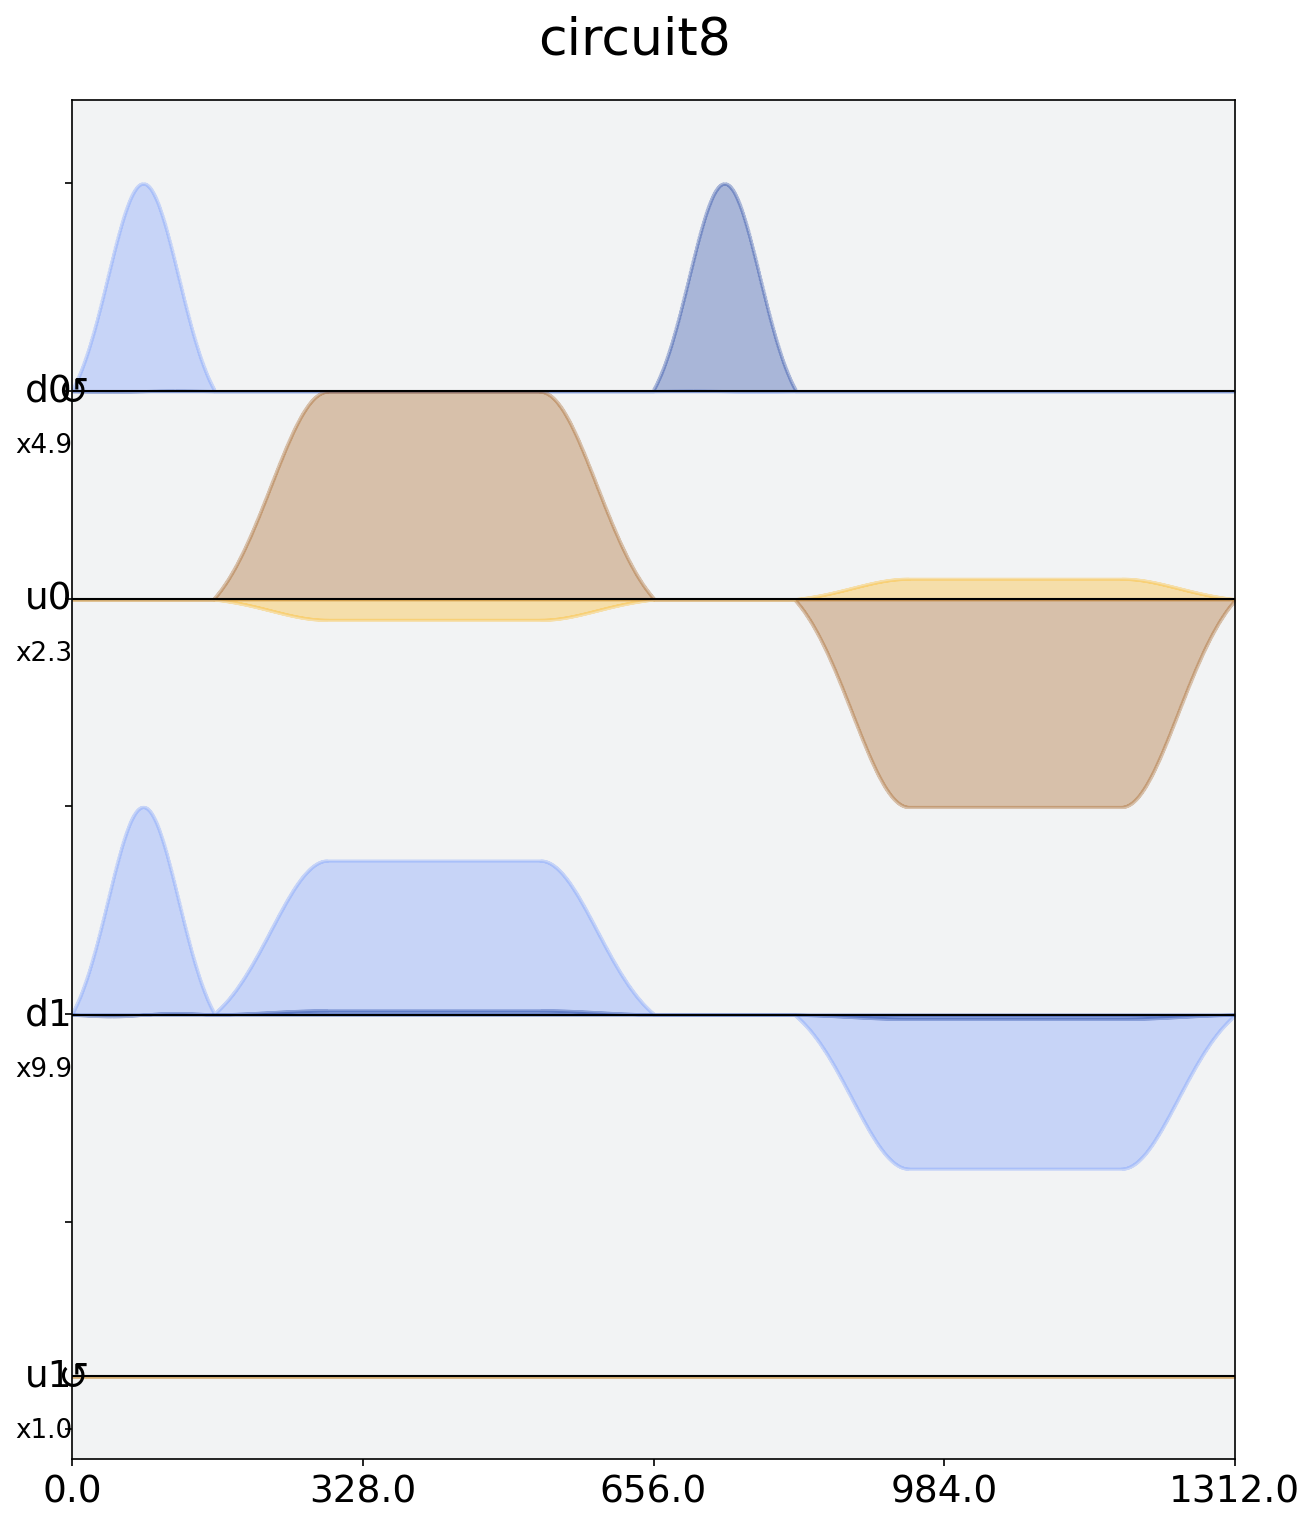

In [29]:
from qiskit.visualization import pulse_drawer

pulse_drawer(schd)

In [28]:
p = schd.instructions
p

((0, ShiftPhase(1.5707963267948966, DriveChannel(0))),
 (0, ShiftPhase(1.5707963267948966, ControlChannel(1))),
 (0,
  Play(Drag(duration=160, amp=(-3.784188116288476e-17-0.20600160628208206j), sigma=40, beta=-0.173662948040679), DriveChannel(0))),
 (0,
  Play(Drag(duration=160, amp=(0.10058111936374743-4.3032023667003576e-05j), sigma=40, beta=-0.5516802856666173), DriveChannel(1))),
 (160,
  Play(GaussianSquare(duration=496, amp=(0.07462242746177622+0.0020919881479301173j), sigma=64, width=240), DriveChannel(1))),
 (160,
  Play(GaussianSquare(duration=496, amp=(-0.04341186177463193+0.43862871136525206j), sigma=64, width=240), ControlChannel(0))),
 (656,
  Play(Drag(duration=160, amp=(0.20600160628208206+0j), sigma=40, beta=-0.173662948040679), DriveChannel(0))),
 (816,
  Play(GaussianSquare(duration=496, amp=(-0.07462242746177622-0.002091988147930108j), sigma=64, width=240), DriveChannel(1))),
 (816,
  Play(GaussianSquare(duration=496, amp=(0.043411861774631876-0.43862871136525206j), 

In [24]:
drag = p.pulse

In [26]:
drag

Drag(duration=160, amp=(-3.784188116288476e-17-0.20600160628208206j), sigma=40, beta=-0.173662948040679)

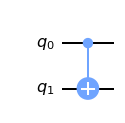

In [34]:
circuit.draw("mpl")

In [38]:
modified_circuit = QuantumCircuit(circuit.num_qubits)

original_layout = [1, 0]
final_layout = [0, 1]

original_to_final_layout = {original_layout[i]: final_layout[i] for i in range(2)}

for gate, qargs, cargs in circuit.data:
    mod_qargs = [original_to_final_layout[q.index] for q in qargs]
    mod_cargs = [c.index for c in cargs]
    modified_circuit.append(gate, qargs=mod_qargs, cargs=mod_cargs)

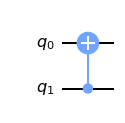

In [39]:
modified_circuit.draw("mpl")